# (Ford GoBike System Data)
## by (Elias Sadeeq)

## Introduction
> Formerly known as Ford GoBike, renamed Lyft Bikes is a regional public bicycle sharing system in the San Francisco Bay Area, California. From february 2019 FordGo Bike and Baywheels Tripdata


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
df.member_gender.unique()

array(['Male', nan, 'Other', 'Female'], dtype=object)

In [4]:
# overview of the strcture
print(df.shape)
print(df.dtypes)

(183412, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object


In [5]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [6]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [7]:
print(df[df.member_birth_year < 1930].member_birth_year)
print(df[df.member_birth_year < 1930].shape)
df[df.member_birth_year < 1930].member_birth_year

1285      1900.0
10827     1900.0
16087     1900.0
17981     1920.0
18885     1920.0
           ...  
173711    1900.0
177708    1900.0
177885    1902.0
182830    1901.0
183388    1927.0
Name: member_birth_year, Length: 77, dtype: float64
(77, 16)


1285      1900.0
10827     1900.0
16087     1900.0
17981     1920.0
18885     1920.0
           ...  
173711    1900.0
177708    1900.0
177885    1902.0
182830    1901.0
183388    1927.0
Name: member_birth_year, Length: 77, dtype: float64

### What is the structure of your dataset?

> There is over 180k observation in this dataset and 16 columns that repersent the bike users. variables about the name of both start_station and end_station and thier lat and long coordinates. The users are divided into two groups 1.Member (Subscriber) and 2.Customer, also thier year of birth (age). An impoertant variables is the duration of the trip in seconds.

### What is/are the main feature(s) of interest in your dataset?

> The duration in comparing with diffrent genders and the diffrent user group. a question such as Do member have higher durection trip than regualr customer? The result of this could encurage a customer to be a member.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I beleive the duration, month, day and hour of the trip will be helpful in comparing diffrent groups such as gender and user type..

### Wrangling step - assessing and cleaning.
- assess visually and programmatically.
1. ASSESSMNET:
>dtypes:
- start_time as datetime or int
- end_time as datetime or int
- start_station_id as String object
- end_station_id as String object
- bike_id as string
- user_type as categorical
- member_birth_year as datetime or maybe int.
>null values:
- member_birth_year
- member_gender
- start_station_id
- start_station_name
- end_station_id
- end_station_name

In [8]:
df.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

In [9]:
# checking for null values
len(df) - df.count()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [10]:
# checking for duplicated values
len(df) - len(df.duplicated())

0

In [11]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [20]:
a = df['member_birth_year'].unique()
print(sorted(a))

[1984.0, nan, 1878.0, 1900.0, 1901.0, 1902.0, 1910.0, 1920.0, 1927.0, 1928.0, 1930.0, 1931.0, 1933.0, 1934.0, 1938.0, 1939.0, 1941.0, 1942.0, 1943.0, 1944.0, 1945.0, 1946.0, 1947.0, 1948.0, 1949.0, 1950.0, 1951.0, 1952.0, 1953.0, 1954.0, 1955.0, 1956.0, 1957.0, 1958.0, 1959.0, 1960.0, 1961.0, 1962.0, 1963.0, 1964.0, 1965.0, 1966.0, 1967.0, 1968.0, 1969.0, 1970.0, 1971.0, 1972.0, 1973.0, 1974.0, 1975.0, 1976.0, 1977.0, 1978.0, 1979.0, 1980.0, 1981.0, 1982.0, 1983.0, 1985.0, 1986.0, 1987.0, 1988.0, 1989.0, 1990.0, 1991.0, 1992.0, 1993.0, 1994.0, 1995.0, 1996.0, 1997.0, 1998.0, 1999.0, 2000.0, 2001.0]


In [21]:
print(df[df.member_birth_year == 1878].member_birth_year)

27370    1878.0
Name: member_birth_year, dtype: float64


In [22]:
df.iloc[27370, df.columns.get_loc('member_birth_year')] = 1986

In [23]:
users = df.user_type.unique()
users == ['Customer', 'Subscriber']

array([ True,  True])

In [24]:
# dealing with null values.
# so when ever the value of the gender is missing the birth year will always be null.
df[(df.member_gender.isnull()) & (df.member_birth_year.isnull())].shape

(8265, 16)

In [25]:
# drop null values
df.dropna(inplace=True)
df[df.member_gender.isnull()]
df.member_gender.unique()

array(['Male', 'Other', 'Female'], dtype=object)

In [26]:
# fixing the dtypes problems.
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)
df.start_station_id = df.start_station_id.astype(str)
df.end_station_id = df.end_station_id.astype(str)
df.bike_id = df.bike_id.astype(str)
df.user_type = df.user_type.astype('category')
df.member_birth_year = df.member_birth_year.astype(int)

In [27]:
df.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No


In [28]:
df.shape

(174952, 16)

>Since the start_time & end_time column has the year, month, day, and hour we can extract useful information and create new columns to use it in our expolring.
>- Year
>- Month
>- Day
>- Hour
>- Age: extracted from member_birth_year

In [32]:
from datetime import datetime
df['trip_month'] = df.start_time.dt.strftime('%b')
df['trip_day'] = df.start_time.dt.strftime('%a')
df['trip_hour'] = df.start_time.dt.strftime('%H')
df['age'] = datetime.now().year - df.member_birth_year

In [33]:
# unneeded columns
df.drop(axis=1, columns=['start_time','end_time'], inplace=True)

In [34]:
# Final strcture of the dataframe.
df_clean = df.copy()
df_clean.head()

,duration_sec,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,trip_month,trip_day,trip_hour,age
0,52185,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,Feb,Thu,17,38
2,61854,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,Feb,Thu,12,50
3,36490,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No,Feb,Thu,17,33
4,1585,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,Feb,Thu,23,48
5,1793,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No,Feb,Thu,23,63


array(['Thu', 'Wed', 'Tue', 'Mon', 'Sun', 'Sat', 'Fri'], dtype=object)

## Univariate Exploration

>In this section, I will investigate the distributions of some variables individually.

- Distrubition is skewed
- most values are between 250 and 3000.
- the most right values I would not consider them as outliers yet.


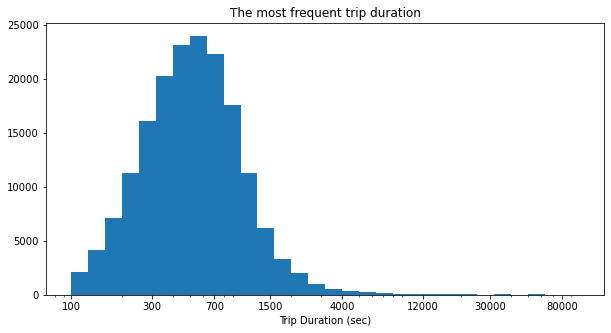

In [38]:
# duration.
bins = 10 ** np.arange(2, 5.0 + 0.1, 0.1) 
plt.figure(figsize=[10, 5])
plt.hist(data=df_clean, x='duration_sec', bins=bins)
ticks = [100, 300, 700 , 1500, 4000, 12000, 30000, 80000]
labels = ['{}'.format(val) for val in ticks]
plt.xscale('log')
plt.xticks(ticks, labels)
plt.xlabel('Trip Duration (sec)')
plt.title('The most frequent trip duration')
plt.show();

In [39]:
df_clean.head(1)

,duration_sec,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,trip_month,trip_day,trip_hour,age
0,52185,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,Feb,Thu,17,38


### Exploring the days variable.
weekdays has way more trips than the weekends, as expected.

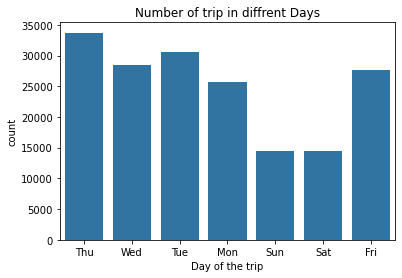

In [41]:
sb.countplot(data=df_clean, x='trip_day', color=sb.color_palette()[0]);
plt.xlabel('Day of the trip')
plt.title('Number of trip in diffrent Days');

#### Age distribution
>- Age seems to be unrealstic, there are more than 300 records with age greater than 100 years old. Most of whcih are subscriber so deleting these rows could affect other aspect in comapring the user_types and trip duration in Bivariate and Multivariate steps.
>- Beside that the distruption seems normal most points were between 35 to 45 years.

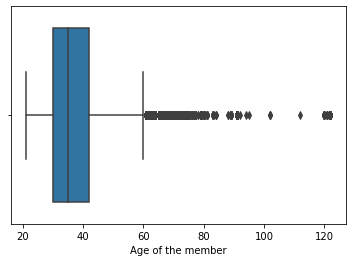

In [42]:
# I would consider the Outliers from maybe 95 yers and above.
sb.boxplot(data=df_clean, x='age', color=sb.color_palette()[0]);
plt.xlabel('Age of the member');

In [44]:
np.log10(df_clean.age.describe())

count    5.242919
mean     1.570499
std      1.004988
min      1.322219
25%      1.477121
50%      1.544068
75%      1.623249
max      2.086360
Name: age, dtype: float64

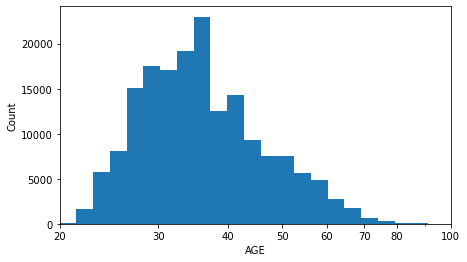

In [45]:
bins = 10 ** np.arange(1, 3.0 + 0.03 ,0.03) 
plt.figure(figsize=[7, 4])
plt.hist(data=df_clean, x='age', bins=bins)
ticks = [20, 30, 40 , 50, 60, 70, 80, 100]
labels = ['{}'.format(val) for val in ticks]
plt.xscale('log')
plt.xticks(ticks, labels)
plt.xlabel('AGE')
plt.ylabel('Count')
plt.xlim(20,100)
plt.show();

In [46]:
# takeing a deeper look.
np.sort(df_clean.age.unique())

array([ 21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,
        34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,
        47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,
        60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,
        73,  74,  75,  76,  77,  78,  79,  80,  81,  83,  84,  88,  89,
        91,  92,  94,  95, 102, 112, 120, 121, 122])

In [47]:
# lets fix what we can
df_clean[df_clean.age > 100].member_birth_year.unique()

array([1900, 1920, 1901, 1902, 1910])

In [48]:
df_clean[df_clean.age > 100].head()

,duration_sec,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,trip_month,trip_day,trip_hour,age
1285,148,158.0,Shattuck Ave at Telegraph Ave,37.833279,-122.263490,173.0,Shattuck Ave at 55th St,37.840364,-122.264488,5391,Subscriber,1900,Male,Yes,Feb,Thu,19,122
10827,1315,343.0,Bryant St at 2nd St,37.783172,-122.393572,375.0,Grove St at Masonic Ave,37.774836,-122.446546,6249,Subscriber,1900,Male,No,Feb,Wed,19,122
16087,1131,375.0,Grove St at Masonic Ave,37.774836,-122.446546,36.0,Folsom St at 3rd St,37.783830,-122.398870,4968,Subscriber,1900,Male,No,Feb,Wed,08,122
17981,366,50.0,2nd St at Townsend St,37.780526,-122.390288,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,5226,Subscriber,1920,Male,No,Feb,Tue,19,102
18885,432,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,50.0,2nd St at Townsend St,37.780526,-122.390288,5319,Subscriber,1920,Male,No,Feb,Tue,17,102


In [49]:
# most of them are subscriber.
df_clean[df_clean.age > 100].user_type.value_counts()

Subscriber    70
Customer       4
Name: user_type, dtype: int64

In [50]:
# taking look at each individual outlier
df_clean[df_clean.age > 100].member_birth_year.value_counts()

1900    53
1902    11
1901     6
1920     3
1910     1
Name: member_birth_year, dtype: int64

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The duration_trip was skweed and had many ponts; a scale transformation was requred. Most points were under 25 min.
>
>The Months of each trip was not really surprising, most trip took place during summer and warmer weather in general and far less during colder seasons.
>
>The days of the week had more trip than weekends, weekdays had a close distribution, but it's clear that after the weakend the number of trip increased slowly to it's peek on Tuesday.
>
>Age had some problems with outliers, but moving a way from this, the boxplot and histogram seem to be fair enough. Most points were between 35 to 45 years. Log scale was needed to produce the correct result due to the large number of points.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Almost all of the variables were adjusted, because the data was not tidy and a lot of columns were lost such as month, weekdays, weekend, hours, and age. Due to poor data structure.

## Bivariate Exploration

> I will further expolore the variables observer from the Univariate step and more.

Some intersting relationship.
- Trip duration and Age
- Time of trip (hour) and Days.
- Member Gender and Trip duration
- User Type and Member Gender
- Member Gender and Days.
- costumers and subscribers

>In february 2019, 90.53% of the user types in the Ford GoBikes sharing platform were Subscribers. 9.47% of the user types in the Ford GoBikes Sharing Platform were Customers.

In [69]:
customer = df.query('user_type == "Customer"')['bike_id'].count()
subscriber = df.query('user_type == "Subscriber"')['bike_id'].count()
customer_prop = customer / df['bike_id'].count()
subscriber_prop = subscriber / df['bike_id'].count()

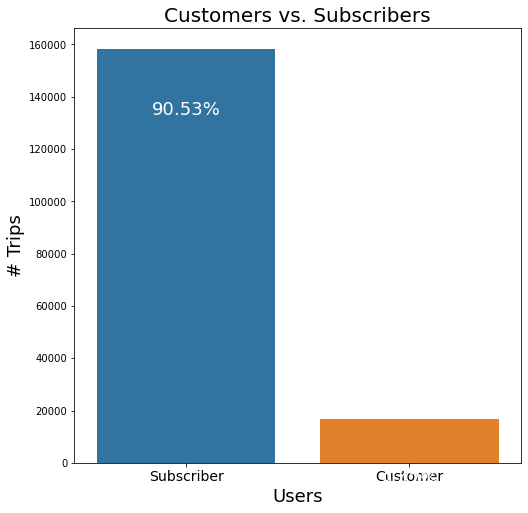

In [70]:
plt.figure(figsize=(8,8))
sb.countplot(data = df, x = "user_type", order = df['user_type'].value_counts().index);
plt.ylabel('# Trips',fontsize = 18)
plt.xlabel('Users',fontsize = 18)
plt.title('Customers vs. Subscribers',fontsize = 20)
plt.xticks(size=14);
plt.text(0, subscriber-20000,str(round(subscriber_prop*100,2))+'%', ha = 'center',va = 'top', color = 'white',fontsize = 18)
plt.text(1, customer-20000,str(round(customer_prop*100,2))+'%', ha = 'center',va = 'top', color = 'white',fontsize = 18);

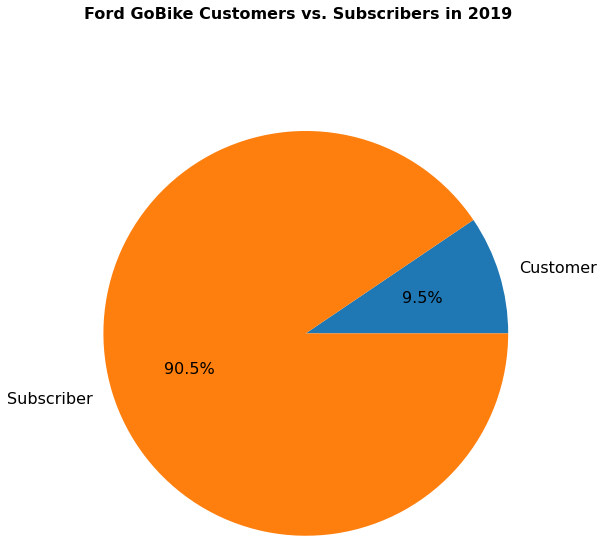

In [71]:
plt.figure(figsize = [8, 8])
labels = ['Customer', 'Subscriber']
size = [customer_prop, subscriber_prop]
plt.pie(size, labels = labels, autopct='%1.1f%%', textprops={'color':'black','size':16})
plt.axis('equal')
plt.suptitle('Ford GoBike Customers vs. Subscribers in 2019', y=1.07,
             fontsize=16, fontweight='bold');

AGE and Trip Duration

In comparing the Age with Trip Duration from the below figures, we have an inverse relationship between the two variable. duration trip decreases in general as age increses as excpected.

In [51]:
numeric_vars = ['duration_sec', 'age']

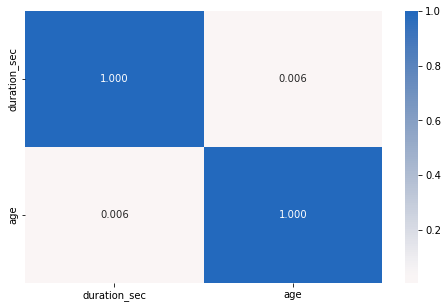

In [52]:
plt.figure(figsize = [8, 5])
sb.heatmap(df_clean[numeric_vars].corr(), annot = True, fmt = '.3f',cmap = 'vlag_r', center = 0)
plt.show()

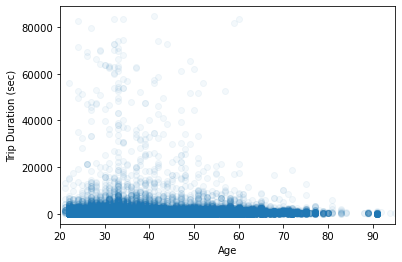

In [53]:
# a scatter plot.
plt.scatter(data=df_clean, x='age', y='duration_sec', alpha=1/20)
plt.xlim(20, 95) ## for better and focused result.
plt.xlabel('Age')
plt.ylabel('Trip Duration (sec)');

##### Looking at the Member gender.
- Male seem to the higher trip duration, but this need to be investigated more. (propration)

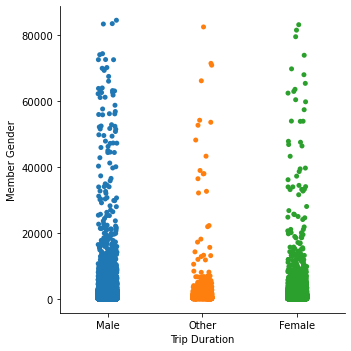

In [54]:
sb.catplot(x="member_gender", y="duration_sec", data=df_clean)
plt.xlabel('Trip Duration')
plt.ylabel('Member Gender');

C:\Users\sadeeq\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


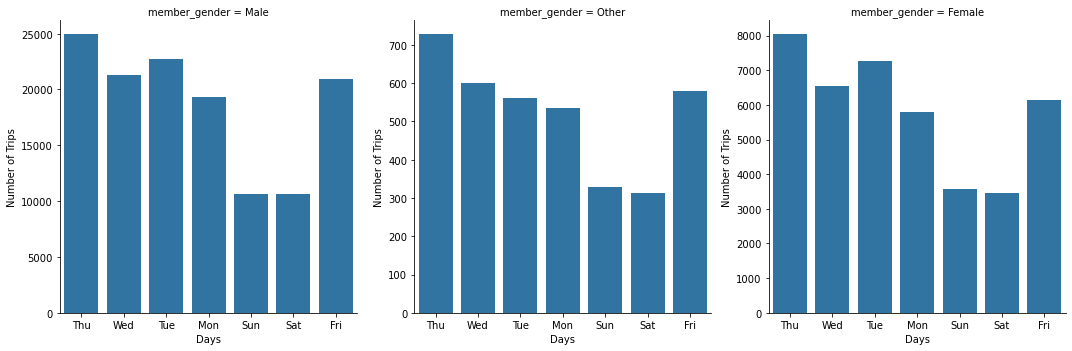

In [56]:
month_order = list(reversed(df_clean.trip_month.unique()))
g = sb.FacetGrid(data=df_clean,col='member_gender', col_wrap = 3, height = 5, sharey=False)
g.map(sb.countplot, 'trip_day')

for i in range(3):
    g.axes[i].set_xlabel('Days')
    g.axes[i].set_ylabel('Number of Trips')

plt.show();

##### User Type with member gender

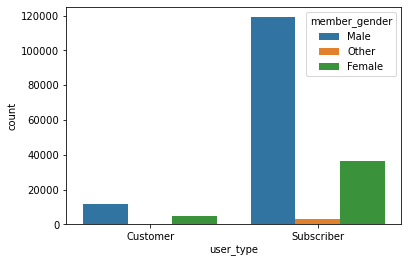

In [59]:
sb.countplot(data=df_clean, x='user_type', hue='member_gender');

###### Time of the trip in diffrent days between Subscribers and Customers.
- 10 to 17 is the obvious difference in both groups.
- Subscriber seem to unimodal
- Both model are left skewwed as excpected (midnight to dawn)

C:\Users\sadeeq\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


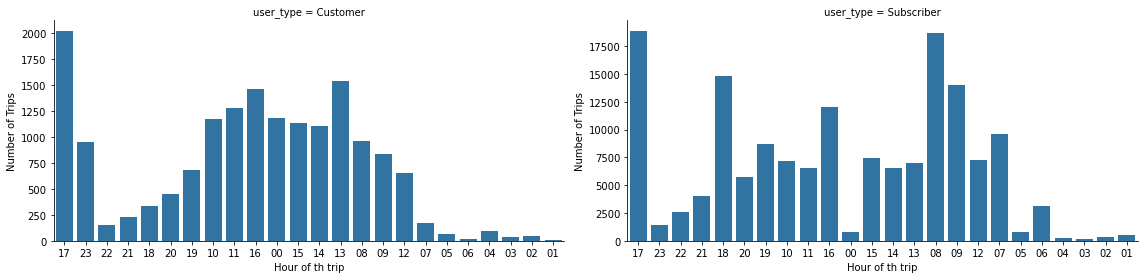

In [60]:
g = sb.FacetGrid(data=df_clean,col='user_type', col_wrap = 2, height = 4, aspect=2, sharey=False)
g.map(sb.countplot, 'trip_hour')
for i in range(2):
    g.axes[i].set_xlabel('Hour of th trip')
    g.axes[i].set_ylabel('Number of Trips')

#### Other variables:
Station and user type

In [61]:
df_sub = df_clean.query('user_type == "Subscriber"').start_station_name.value_counts()
df_cus = df_clean.query('user_type == "Customer"').start_station_name.value_counts()

freq_station = df_clean.start_station_name.value_counts()
y = freq_station.values[0:10] 
x = freq_station.index[0:10] 

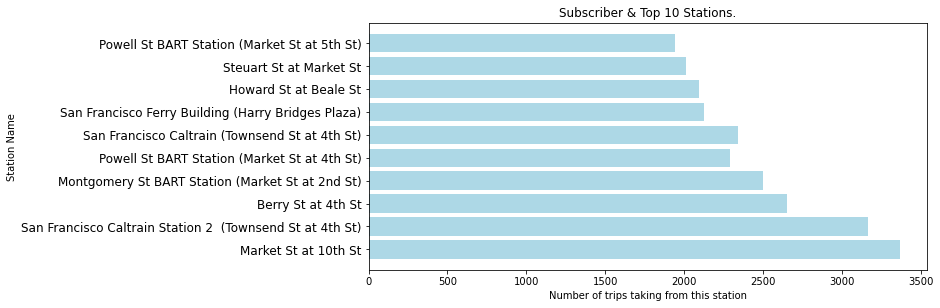

In [62]:
x_sub = df_sub.index[0:10] 
y_sub = df_sub.values[0:10] 

x_cus = df_cus.index[0:10] 
y_cus = df_cus.values[0:10] 

plt.figure(figsize = [10, 10]) # larger figure size for subplots

plt.subplot(2,1,1)
plt.barh(x,df_sub[x],color='lightblue')
plt.yticks(fontsize=12)
plt.title('Subscriber & Top 10 Stations.')
plt.xlabel('Number of trips taking from this station')
plt.ylabel('Station Name');

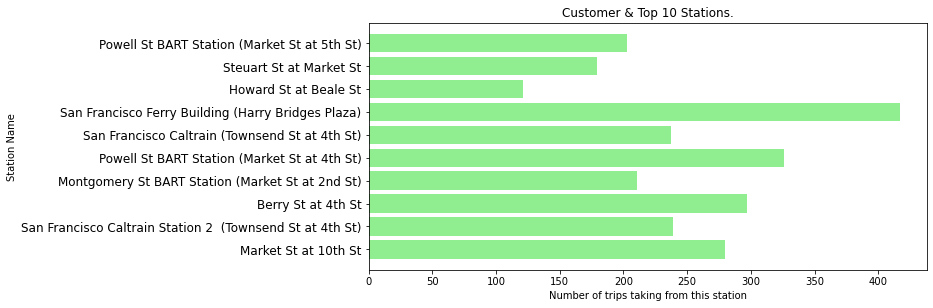

In [63]:
plt.figure(figsize = [10, 10]) # larger figure size for subplots
plt.subplot(2, 1, 2)
plt.barh(x,df_cus[x],color='lightgreen')
plt.yticks(fontsize=12)
plt.title('Customer & Top 10 Stations.')
plt.xlabel('Number of trips taking from this station')
plt.ylabel('Station Name');

>### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
>Most Members that go on Trips are Subscribers
>
> Age and Trip duration: In comparing the Age with Trip Duration from the below figures, we have an inverse relationship between the two variable. duration trip decreases in general as age increses as excpected.
>
>Member Gender with Trip duartion, and days: Male gender is most frequent. Male seem to be slightly higher trip duartion than female. comparing the days of the trip, lower trip in weekends and higher in weekdays in all genders.
>
>Time of the trip (hour) with user type: Subscriber seem to be Unimodal it has a lower trips from 10 to 17 o'clock. The Customer in these hours have more trips. Both type are left skewed.
>
>### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
>
> In comparing the customer type and the most frequent start station of all trips. There was no direct relation between the most frequent station and the customer.

## Multivariate Exploration

> In this section I will try imporving the result of the previos figures by adding more variables to the equation.

##### Trip duration of each day for member gender.
Others in general tend to have much longer trips.

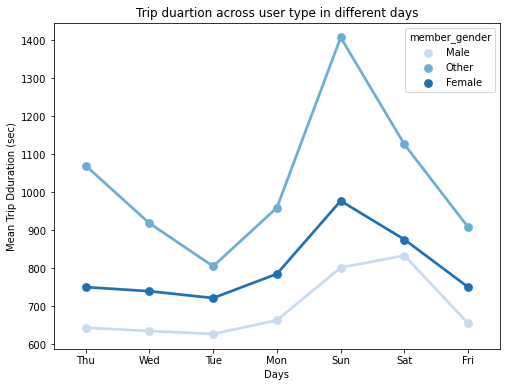

In [64]:
fig = plt.figure(figsize = [8,6])
sb.pointplot(data = df_clean, x = 'trip_day', y = 'duration_sec', hue = 'member_gender', palette = 'Blues', ci=None)
plt.title('Trip duartion across user type in different days')
plt.ylabel('Mean Trip Dduration (sec)')
plt.xlabel('Days')
plt.show();

###### Days and hours with user type
This is a good oppertinity to create heatmap.

In [67]:
df_sub = df_clean.query('user_type == "Subscriber"').groupby(['trip_day','trip_hour'], 
                                                           as_index=False).size().reset_index()
df_cus = df_clean.query('user_type == "Customer"').groupby(['trip_day','trip_hour'], 
                                                           as_index=False).size().reset_index()

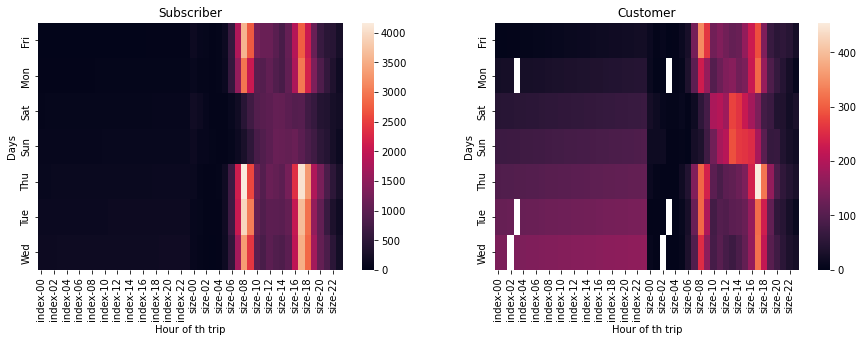

In [68]:
plt.figure(figsize = [15, 10]) # larger figure size for subplots


plt.subplot(2,2,1)
sb.heatmap(df_sub.pivot('trip_day','trip_hour'))
plt.title('Subscriber')
plt.ylabel('Days')
plt.xlabel('Hour of th trip')

plt.subplot(2,2,2) 
sb.heatmap(df_cus.pivot('trip_day','trip_hour'))
plt.title('Customer')
plt.ylabel('Days')
plt.xlabel('Hour of th trip');

#### Trip duartion across user type in different hours in the day.

Text(0.5, 21.706249999999933, 'Hour of the trip')

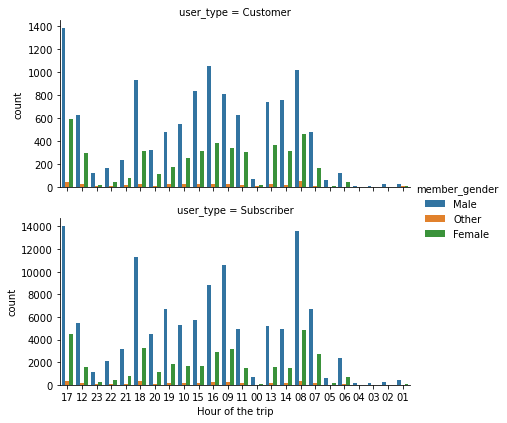

In [72]:
sb.catplot(data=df_clean,x='trip_hour',col='user_type', 
           hue='member_gender', col_wrap = 1, 
           height = 3, aspect=2, 
           sharey=False, kind='count')
plt.xlabel('Hour of the trip')

>### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
>
>Trip duartion of each day for different memeber gender, by adding the 'member gender' in the equetion we can now observe the average trip duration of each gender in diffrent days.
>
>Building a heatmap to observe the frequent hours in each day made by each user type.
>
>### Were there any interesting or surprising interactions between features?
>
> It was not clear at first but after bulding a pointplot we can see that other members has much higher trip duration than any other genders. The customer has higher trip duration than subscriber in avarage. Looking at the heatmap the subscriber is far less active than the customer which was a surprise to me.

In [73]:
df_clean.to_csv('fordgobike-tripdata_clean.csv', index=False)